In [24]:
import pandas as pd
df = pd.read_csv("TrazasHP_Eventos_Febrero.csv", delimiter=';')

In [25]:
level_filtered = df[df['Value.EventType'].str.contains('LevelDifficultyEvent')]

from collections import defaultdict
# Guarda True si es con coberturas y False sin coberturas
cover_dict = defaultdict(bool)

current_sid = ''
for ind in level_filtered.index:
    a = str(level_filtered['Name'][ind])
    if a not in current_sid:
        run = 0
        current_sid = a
        
        if 'EASY' in level_filtered['Value.levelDifficulty'][ind]:
            cover_dict[a] = True
        else:
            cover_dict[a] = False

In [26]:
df_forms = pd.read_csv("TrazasHP_Forms_Febrero.csv", delimiter=';')
skills = df_forms[['Name','Value.Skill']].dropna()

skillsIDs = defaultdict(list)
for ind in skills.index:
    skillsIDs[skills['Name'][ind]].append(skills['Value.Skill'][ind])

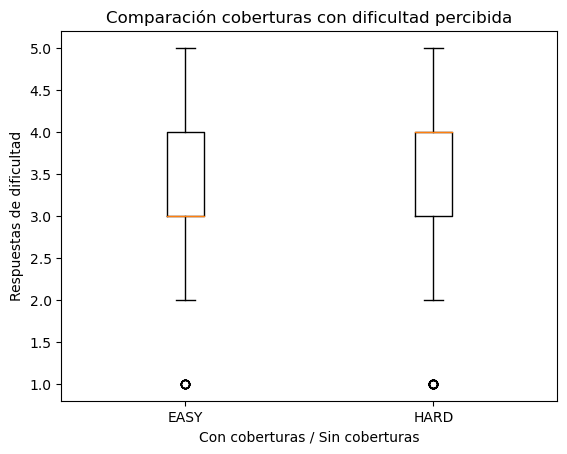

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Esta sesión responde 3 al forms 21 veces, lo que hace pensar que probablemente haya sido un fallo de Firebase o al convertirlo a csv
# Descartamos la mayoría porque con los pocos datos que tenemos hace que todos los cuartiles den en 3, dando una imagen irreal
skillsIDs[3976523808826057435] = [3.0]

data = [[],[]]
for ind in skillsIDs:
    for i in range(0,len(skillsIDs[ind])):
        if skillsIDs[ind]:
            if cover_dict[str(ind)]:
                data[0]+=(skillsIDs[ind])
            else:
                data[1]+=(skillsIDs[ind])
                
plt.boxplot(data)

plt.xticks([1,2], ['EASY', 'HARD'])
plt.xlabel("Con coberturas / Sin coberturas")
plt.ylabel("Respuestas de dificultad")
plt.title("Comparación coberturas con dificultad percibida")

plt.savefig("Resultados/Coberturas-Forms.pdf", format="pdf", bbox_inches="tight")

plt.show()